In [1]:
import yfinance as yf
import pandas as pd

# 30 Fortune 500 tickers (sample selection)
tickers = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "META", "JPM", "BAC", "WMT", "PG", "XOM",
    "CVX", "KO", "PEP", "INTC", "NFLX", "TSLA", "CSCO", "DIS", "NVDA", "V",
    "MA", "HD", "UNH", "PFE", "MRK", "T", "VZ", "NKE", "ORCL", "IBM"
]

# Download 5 years of daily data
data = yf.download(tickers, start="2010-01-01", end="2025-8-08", group_by="ticker")

# Reformat into tidy dataframe
dfs = []
for ticker in tickers:
    df = data[ticker].copy()
    df["ticker"] = ticker
    dfs.append(df.reset_index())

df_all = pd.concat(dfs, axis=0)
df_all.rename(columns={
    "Date": "date", "Open": "open", "High": "high",
    "Low": "low", "Close": "close", "Volume": "volume"
}, inplace=True)

# Calculate daily returns
df_all["return"] = df_all.groupby("ticker")["close"].pct_change()

df_all = df_all.dropna().reset_index(drop=True)

print(df_all.head())


/tmp/ipython-input-2545361134.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2010-01-01", end="2025-8-08", group_by="ticker")
[*********************100%***********************]  30 of 30 completed


Price       date      open      high       low     close       volume ticker  \
0     2010-01-05  6.442317  6.472037  6.401790  6.435713  601904800.0   AAPL   
1     2010-01-06  6.435713  6.461230  6.326739  6.333344  552160000.0   AAPL   
2     2010-01-07  6.356761  6.364266  6.275706  6.321637  477131200.0   AAPL   
3     2010-01-08  6.313229  6.364264  6.276005  6.363663  447610800.0   AAPL   
4     2010-01-11  6.388281  6.394285  6.257693  6.307527  462229600.0   AAPL   

Price    return  
0      0.001729  
1     -0.015906  
2     -0.001849  
3      0.006648  
4     -0.008821  


/tmp/ipython-input-2545361134.py:28: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_all["return"] = df_all.groupby("ticker")["close"].pct_change()


In [2]:
# Pivot into wide format: Date as index, tickers as columns
df_wide = df_all.pivot(index="date", columns="ticker", values="close")

# Sort by date
df_wide = df_wide.sort_index()

# Handle missing values (forward fill, then drop if any remain)
df_wide = df_wide.ffill().bfill()

print(df_wide.head())
print(df_wide.shape)


ticker          AAPL    AMZN        BAC       CSCO        CVX        DIS  \
date                                                                       
2010-01-05  6.435713  6.7345  12.700290  16.086178  42.432953  27.407339   
2010-01-06  6.333344  6.6125  12.849241  15.981464  42.438274  27.261686   
2010-01-07  6.321637  6.5000  13.272584  16.053453  42.278400  27.270262   
2010-01-08  6.363663  6.6760  13.154996  16.138535  42.353012  27.313097   
2010-01-11  6.307527  6.5155  13.272584  16.092728  43.104465  26.867586   

ticker          GOOGL         HD        IBM       INTC  ...        PEP  \
date                                                    ...              
2010-01-05  15.522272  19.955238  72.398087  13.512953  ...  39.176678   
2010-01-06  15.130977  19.886135  71.927795  13.467629  ...  38.784779   
2010-01-07  14.778733  20.121067  71.678818  13.338133  ...  38.538269   
2010-01-08  14.975751  20.024336  72.398087  13.487051  ...  38.411854   
2010-01-11  14.953115  

In [3]:
# Save final dataset for later graph modeling
df_wide.to_csv("fortune30_prices.csv")


In [4]:
import yfinance as yf
import pandas as pd

# Fortune 500 sample tickers
tickers = [
    "AAPL","AMZN","BA","BAC","CAH","COST","CVS",
    "PCAR","PSX","T","UNH","UNP","VZ","WBA","WFC","WMT","XOM","IBM",
    "MSFT","GOOGL","JPM","GS","PEP","KO","ORCL","CSCO","INTC","MMM"
]

# Download Adjusted Close prices only
data = yf.download(tickers, start="2010-01-01", end="2025-06-01")["Close"]

# Ensure columns are flat (drop the MultiIndex names like 'Ticker')
data.columns.name = None

# Reset index
df = data.reset_index()

# Preview
print(df.head())


/tmp/ipython-input-1011229468.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2010-01-01", end="2025-06-01")["Close"]
[*********************100%***********************]  28 of 28 completed

        Date      AAPL    AMZN         BA        BAC        CAH       COST  \
0 2010-01-04  6.424605  6.6950  43.777550  12.300463  21.750429  42.221546   
1 2010-01-05  6.435713  6.7345  45.211330  12.700293  21.556532  42.093620   
2 2010-01-06  6.333344  6.6125  46.582798  12.849243  21.202162  42.640842   
3 2010-01-07  6.321634  6.5000  48.468552  13.272586  21.195471  42.434742   
4 2010-01-08  6.363664  6.6760  48.001019  13.154995  21.128614  42.129158   

        CSCO        CVS      GOOGL  ...        PEP  PSX         T        UNH  \
0  16.158171  22.696714  15.590929  ...  38.708935  NaN  6.896149  24.919048   
1  16.086178  22.607244  15.522272  ...  39.176666  NaN  6.862366  24.879532   
2  15.981467  22.407661  15.130976  ...  38.784790  NaN  6.794953  25.124540   
3  16.053463  23.233503  14.778734  ...  38.538269  NaN  6.718658  26.088736   
4  16.138529  23.398670  14.975752  ...  38.411865  NaN  6.669439  25.843735   

         UNP         VZ        WBA        WFC     

In [5]:
print(df.head())       # show first rows
print(df.columns)      # show all column names



        Date      AAPL    AMZN         BA        BAC        CAH       COST  \
0 2010-01-04  6.424605  6.6950  43.777550  12.300463  21.750429  42.221546   
1 2010-01-05  6.435713  6.7345  45.211330  12.700293  21.556532  42.093620   
2 2010-01-06  6.333344  6.6125  46.582798  12.849243  21.202162  42.640842   
3 2010-01-07  6.321634  6.5000  48.468552  13.272586  21.195471  42.434742   
4 2010-01-08  6.363664  6.6760  48.001019  13.154995  21.128614  42.129158   

        CSCO        CVS      GOOGL  ...        PEP  PSX         T        UNH  \
0  16.158171  22.696714  15.590929  ...  38.708935  NaN  6.896149  24.919048   
1  16.086178  22.607244  15.522272  ...  39.176666  NaN  6.862366  24.879532   
2  15.981467  22.407661  15.130976  ...  38.784790  NaN  6.794953  25.124540   
3  16.053463  23.233503  14.778734  ...  38.538269  NaN  6.718658  26.088736   
4  16.138529  23.398670  14.975752  ...  38.411865  NaN  6.669439  25.843735   

         UNP         VZ        WBA        WFC     

In [6]:
import pandas as pd



# 1. Convert Date field to datetime
df["Date"] = pd.to_datetime(df["Date"])

# 2. Sort by ticker & date (useful if we have multiple companies in one file)
df = df.sort_values(by=["Date"], ascending=True)

# 3. Handle missing/null values
# Forward fill missing values, then backward fill (in case of NaN at start)
df = df.fillna(method="ffill").fillna(method="bfill")

# 4. Ensure correct data types
df["Date"] = pd.to_datetime(df["Date"])
for col in df.columns:
    if col != "Date":
        df[col] = pd.to_numeric(df[col], errors="coerce")

print(df.head())
print(df.info())


        Date      AAPL    AMZN         BA        BAC        CAH       COST  \
0 2010-01-04  6.424605  6.6950  43.777550  12.300463  21.750429  42.221546   
1 2010-01-05  6.435713  6.7345  45.211330  12.700293  21.556532  42.093620   
2 2010-01-06  6.333344  6.6125  46.582798  12.849243  21.202162  42.640842   
3 2010-01-07  6.321634  6.5000  48.468552  13.272586  21.195471  42.434742   
4 2010-01-08  6.363664  6.6760  48.001019  13.154995  21.128614  42.129158   

        CSCO        CVS      GOOGL  ...        PEP        PSX         T  \
0  16.158171  22.696714  15.590929  ...  38.708935  21.668583  6.896149   
1  16.086178  22.607244  15.522272  ...  39.176666  21.668583  6.862366   
2  15.981467  22.407661  15.130976  ...  38.784790  21.668583  6.794953   
3  16.053463  23.233503  14.778734  ...  38.538269  21.668583  6.718658   
4  16.138529  23.398670  14.975752  ...  38.411865  21.668583  6.669439   

         UNH        UNP         VZ        WBA        WFC        WMT        XOM  

/tmp/ipython-input-3690708764.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


In [7]:
import pandas as pd

# 1. Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# 2. Sort by Date
df = df.sort_values("Date").reset_index(drop=True)

# 3. Convert all price columns (everything except Date) to numeric
for col in df.columns:
    if col != "Date":
        df[col] = pd.to_numeric(df[col], errors="coerce")  # coerce will turn bad strings into NaN

# 4. Check for missing values
print("Any NaNs in dataset? ", df.isna().values.any())
print("Columns with NaN count:\n", df.isna().sum())

# 5. Fill missing values
# Option A: Forward + Backward fill
df_filled = df.ffill().bfill()

# Option B: Linear Interpolation
df_interp = df.interpolate(method="linear", axis=0)

# 6. Final check
print("Remaining NaNs after ffill+bfill:", df_filled.isna().sum().sum())
print("Remaining NaNs after interpolation:", df_interp.isna().sum().sum())



Any NaNs in dataset?  False
Columns with NaN count:
 Date     0
AAPL     0
AMZN     0
BA       0
BAC      0
CAH      0
COST     0
CSCO     0
CVS      0
GOOGL    0
GS       0
IBM      0
INTC     0
JPM      0
KO       0
MMM      0
MSFT     0
ORCL     0
PCAR     0
PEP      0
PSX      0
T        0
UNH      0
UNP      0
VZ       0
WBA      0
WFC      0
WMT      0
XOM      0
dtype: int64
Remaining NaNs after ffill+bfill: 0
Remaining NaNs after interpolation: 0


In [8]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

print("Remaining columns:", df.columns)


Remaining columns: Index(['Date', 'AAPL', 'AMZN', 'BA', 'BAC', 'CAH', 'COST', 'CSCO', 'CVS',
       'GOOGL', 'GS', 'IBM', 'INTC', 'JPM', 'KO', 'MMM', 'MSFT', 'ORCL',
       'PCAR', 'PEP', 'PSX', 'T', 'UNH', 'UNP', 'VZ', 'WBA', 'WFC', 'WMT',
       'XOM'],
      dtype='object')


In [9]:
df

,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2010-01-04,6.424605,6.695000,43.777550,12.300463,21.750429,42.221546,16.158171,22.696714,15.590929,...,38.708935,21.668583,6.896149,24.919048,23.455734,13.987559,22.702438,18.120779,12.986790,38.213135
1,2010-01-05,6.435713,6.734500,45.211330,12.700293,21.556532,42.093620,16.086178,22.607244,15.522272,...,39.176666,21.668583,6.862366,24.879532,23.782145,14.012774,22.519840,18.618233,12.857474,38.362328
2,2010-01-06,6.333344,6.612500,46.582798,12.849243,21.202162,42.640842,15.981467,22.407661,15.130976,...,38.784790,21.668583,6.794953,25.124540,23.818024,13.609851,22.349421,18.644766,12.828731,38.693916
3,2010-01-07,6.321634,6.500000,48.468552,13.272586,21.195471,42.434742,16.053463,23.233503,14.778734,...,38.538269,21.668583,6.718658,26.088736,23.606384,13.528839,22.483324,19.321312,12.835921,38.572327
4,2010-01-08,6.363664,6.676000,48.001019,13.154995,21.128614,42.129158,16.138529,23.398670,14.975752,...,38.411865,21.668583,6.669439,25.843735,24.406292,13.537369,22.513750,19.142223,12.771259,38.417591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,2025-05-23,195.048645,200.990005,202.360001,42.946915,152.285385,1007.104736,62.732758,60.173740,168.266296,...,127.936211,112.024857,27.148727,293.486603,220.772400,42.630703,11.170000,72.404648,96.115509,102.080101
3872,2025-05-27,199.983047,206.020004,201.029999,43.960938,154.209503,1016.381897,63.368931,60.678238,172.690933,...,129.944168,113.213135,27.119024,292.920593,222.998917,42.807838,11.210000,73.557869,97.352623,102.565582
3873,2025-05-28,200.192795,204.720001,201.500000,43.801876,152.664230,1011.738342,62.961380,61.776264,172.151596,...,129.251770,111.668373,27.227936,296.008667,220.841980,42.443726,11.190000,73.299393,97.013412,101.168587
3874,2025-05-29,199.723328,205.699997,208.179993,43.980824,153.521622,1007.344421,62.673115,62.102699,171.652191,...,130.488205,113.559715,27.109123,296.068268,221.169998,42.640545,11.240000,74.074837,96.873741,101.743240


In [10]:
df_s_transpose = df

try:
  df_s_transpose = df_s_transpose.interpolate(inplace = False)
except:
  print("An exception occurred. Operation ignored")
  exit


In [11]:
# check if any value is null
df_s_transpose.isnull().values.any()


np.False_

In [12]:
# check if any column (axis=1) is null
df_s_transpose[df_s_transpose.isna().any(axis = 1)]


,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM


In [13]:
df_s_transpose

,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2010-01-04,6.424605,6.695000,43.777550,12.300463,21.750429,42.221546,16.158171,22.696714,15.590929,...,38.708935,21.668583,6.896149,24.919048,23.455734,13.987559,22.702438,18.120779,12.986790,38.213135
1,2010-01-05,6.435713,6.734500,45.211330,12.700293,21.556532,42.093620,16.086178,22.607244,15.522272,...,39.176666,21.668583,6.862366,24.879532,23.782145,14.012774,22.519840,18.618233,12.857474,38.362328
2,2010-01-06,6.333344,6.612500,46.582798,12.849243,21.202162,42.640842,15.981467,22.407661,15.130976,...,38.784790,21.668583,6.794953,25.124540,23.818024,13.609851,22.349421,18.644766,12.828731,38.693916
3,2010-01-07,6.321634,6.500000,48.468552,13.272586,21.195471,42.434742,16.053463,23.233503,14.778734,...,38.538269,21.668583,6.718658,26.088736,23.606384,13.528839,22.483324,19.321312,12.835921,38.572327
4,2010-01-08,6.363664,6.676000,48.001019,13.154995,21.128614,42.129158,16.138529,23.398670,14.975752,...,38.411865,21.668583,6.669439,25.843735,24.406292,13.537369,22.513750,19.142223,12.771259,38.417591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,2025-05-23,195.048645,200.990005,202.360001,42.946915,152.285385,1007.104736,62.732758,60.173740,168.266296,...,127.936211,112.024857,27.148727,293.486603,220.772400,42.630703,11.170000,72.404648,96.115509,102.080101
3872,2025-05-27,199.983047,206.020004,201.029999,43.960938,154.209503,1016.381897,63.368931,60.678238,172.690933,...,129.944168,113.213135,27.119024,292.920593,222.998917,42.807838,11.210000,73.557869,97.352623,102.565582
3873,2025-05-28,200.192795,204.720001,201.500000,43.801876,152.664230,1011.738342,62.961380,61.776264,172.151596,...,129.251770,111.668373,27.227936,296.008667,220.841980,42.443726,11.190000,73.299393,97.013412,101.168587
3874,2025-05-29,199.723328,205.699997,208.179993,43.980824,153.521622,1007.344421,62.673115,62.102699,171.652191,...,130.488205,113.559715,27.109123,296.068268,221.169998,42.640545,11.240000,74.074837,96.873741,101.743240


In [14]:
# Make a copy of df_s
df_s_transpose = df.copy()

# Define the flag (1 = drop columns with NA, 0 = keep them)
drop_cols_with_na = 1

# Drop columns with missing values if the flag is enabled
if drop_cols_with_na == 1:
    df_s_transpose = df_s_transpose.dropna(axis=1)

print(df_s_transpose.shape)
df_s_transpose.head()


(3876, 29)


,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
0,2010-01-04,6.424605,6.6950,43.777550,12.300463,21.750429,42.221546,16.158171,22.696714,15.590929,...,38.708935,21.668583,6.896149,24.919048,23.455734,13.987559,22.702438,18.120779,12.986790,38.213135
1,2010-01-05,6.435713,6.7345,45.211330,12.700293,21.556532,42.093620,16.086178,22.607244,15.522272,...,39.176666,21.668583,6.862366,24.879532,23.782145,14.012774,22.519840,18.618233,12.857474,38.362328
2,2010-01-06,6.333344,6.6125,46.582798,12.849243,21.202162,42.640842,15.981467,22.407661,15.130976,...,38.784790,21.668583,6.794953,25.124540,23.818024,13.609851,22.349421,18.644766,12.828731,38.693916
3,2010-01-07,6.321634,6.5000,48.468552,13.272586,21.195471,42.434742,16.053463,23.233503,14.778734,...,38.538269,21.668583,6.718658,26.088736,23.606384,13.528839,22.483324,19.321312,12.835921,38.572327
4,2010-01-08,6.363664,6.6760,48.001019,13.154995,21.128614,42.129158,16.138529,23.398670,14.975752,...,38.411865,21.668583,6.669439,25.843735,24.406292,13.537369,22.513750,19.142223,12.771259,38.417591


In [15]:
# further check and verify
df_s_transpose.isnull().values.any()
df_s_transpose[df_s_transpose.isna().any( axis = 1 )]

,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM


In [16]:
df_s_transpose_pearson = df_s_transpose.corr(method = 'pearson', numeric_only = True)
df_s_transpose_pearson

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,1.000000,0.925797,0.327010,0.888549,0.761387,0.966846,0.888023,0.505918,0.976751,0.934866,...,0.927594,0.809806,0.678017,0.960457,0.939306,0.624384,-0.420425,0.644377,0.943904,0.761384
AMZN,0.925797,1.000000,0.522223,0.930365,0.644211,0.901154,0.938381,0.486304,0.953660,0.878254,...,0.893636,0.780257,0.757401,0.914993,0.952963,0.801344,-0.281406,0.639766,0.914461,0.554925
BA,0.327010,0.522223,1.000000,0.605474,0.212430,0.319725,0.670742,0.386987,0.419720,0.349043,...,0.526554,0.581458,0.590999,0.476717,0.566389,0.723479,0.331583,0.534678,0.369891,0.189615
BAC,0.888549,0.930365,0.605474,1.000000,0.639575,0.873984,0.950609,0.572050,0.935455,0.912916,...,0.896028,0.823361,0.774828,0.914924,0.944182,0.771573,-0.159390,0.765646,0.873188,0.616099
CAH,0.761387,0.644211,0.212430,0.639575,1.000000,0.837625,0.653160,0.538165,0.758843,0.833321,...,0.697269,0.833139,0.716855,0.703538,0.684776,0.449713,-0.162900,0.818137,0.817345,0.843551
COST,0.966846,0.901154,0.319725,0.873984,0.837625,1.000000,0.868638,0.454099,0.961936,0.962800,...,0.874537,0.852893,0.741133,0.914725,0.901362,0.612854,-0.438474,0.737294,0.978863,0.807627
CSCO,0.888023,0.938381,0.670742,0.950609,0.653160,0.868638,1.000000,0.563426,0.921846,0.864467,...,0.925680,0.835989,0.790621,0.926056,0.957109,0.807007,-0.159596,0.719022,0.881886,0.621364
CVS,0.505918,0.486304,0.386987,0.572050,0.538165,0.454099,0.563426,1.000000,0.539392,0.484818,...,0.668505,0.577104,0.592463,0.605219,0.631377,0.644859,0.467410,0.619725,0.421722,0.432970
GOOGL,0.976751,0.953660,0.419720,0.935455,0.758843,0.961936,0.921846,0.539392,1.000000,0.950662,...,0.924534,0.847467,0.733701,0.951647,0.952505,0.695197,-0.324506,0.724791,0.940642,0.733302
GS,0.934866,0.878254,0.349043,0.912916,0.833321,0.962800,0.864467,0.484818,0.950662,1.000000,...,0.841785,0.840736,0.754039,0.885875,0.876480,0.593424,-0.338265,0.807291,0.950849,0.786537


In [17]:
df_s_transpose_pearson[df_s_transpose_pearson >= 0.5] = 1
df_s_transpose_pearson[df_s_transpose_pearson < 0.5] = 0
df_s_transpose_pearson

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
AMZN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
BA,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
BAC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CAH,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
COST,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CSCO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CVS,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
GOOGL,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
GS,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [18]:
# make the diagonal element to be zero. No self loop/edge
import numpy as np
np.fill_diagonal(df_s_transpose_pearson.values, 0)
df_s_transpose_pearson

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,...,PEP,PSX,T,UNH,UNP,VZ,WBA,WFC,WMT,XOM
AAPL,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
AMZN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
BA,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
BAC,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CAH,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
COST,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CSCO,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
CVS,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
GOOGL,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
GS,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


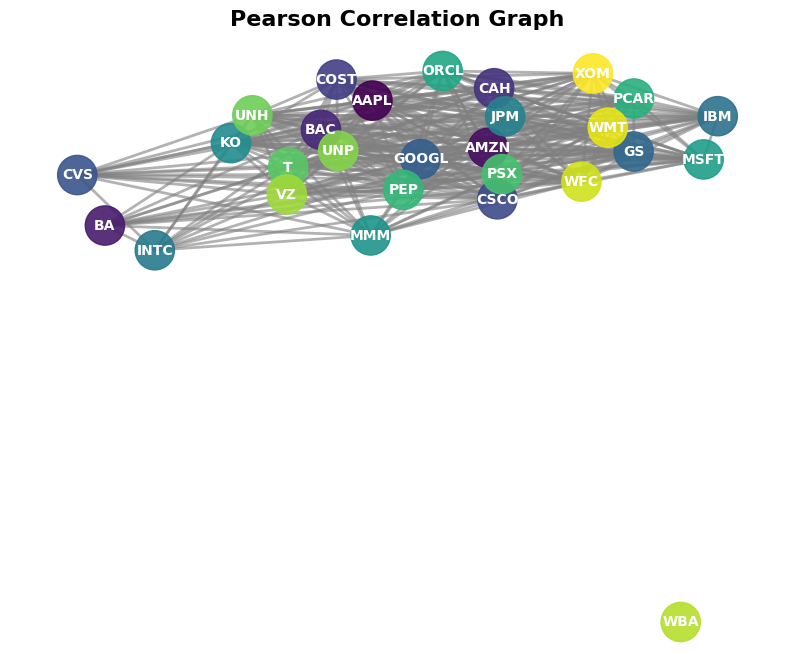

In [19]:
import networkx as nx
Graph_pearson = nx.Graph(df_s_transpose_pearson)


import matplotlib.pyplot as plt
import networkx as nx

# Example: using your Graph_pearson
plt.figure(figsize=(10, 8))

# Positions (spring layout is usually prettier than circular)
pos = nx.spring_layout(Graph_pearson, k=0.5, seed=42)

# Draw nodes
nx.draw_networkx_nodes(
    Graph_pearson,
    pos,
    node_size=800,
    node_color=range(len(Graph_pearson)),
    cmap=plt.cm.viridis,
    alpha=0.9
)

# Draw edges with transparency & width
nx.draw_networkx_edges(
    Graph_pearson,
    pos,
    edge_color='gray',
    width=2,
    alpha=0.6
)

# Draw labels
nx.draw_networkx_labels(
    Graph_pearson,
    pos,
    font_size=10,
    font_color="white",
    font_weight="bold"
)

plt.title("Pearson Correlation Graph", fontsize=16, fontweight="bold")
plt.axis("off")
plt.show()


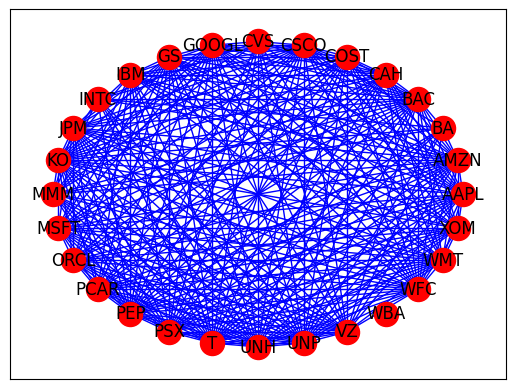

In [20]:

nx.draw_networkx(Graph_pearson, pos = nx.circular_layout( Graph_pearson ), node_color = 'r', edge_color = 'b')

In [21]:
df_s_transpose.corr(method = 'pearson', numeric_only = True)
#df_s_transpose[[{1,2,3}]]

df_s_transpose.iloc[:, 0:10]

,Date,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL
0,2010-01-04,6.424605,6.695000,43.777550,12.300463,21.750429,42.221546,16.158171,22.696714,15.590929
1,2010-01-05,6.435713,6.734500,45.211330,12.700293,21.556532,42.093620,16.086178,22.607244,15.522272
2,2010-01-06,6.333344,6.612500,46.582798,12.849243,21.202162,42.640842,15.981467,22.407661,15.130976
3,2010-01-07,6.321634,6.500000,48.468552,13.272586,21.195471,42.434742,16.053463,23.233503,14.778734
4,2010-01-08,6.363664,6.676000,48.001019,13.154995,21.128614,42.129158,16.138529,23.398670,14.975752
...,...,...,...,...,...,...,...,...,...,...
3871,2025-05-23,195.048645,200.990005,202.360001,42.946915,152.285385,1007.104736,62.732758,60.173740,168.266296
3872,2025-05-27,199.983047,206.020004,201.029999,43.960938,154.209503,1016.381897,63.368931,60.678238,172.690933
3873,2025-05-28,200.192795,204.720001,201.500000,43.801876,152.664230,1011.738342,62.961380,61.776264,172.151596
3874,2025-05-29,199.723328,205.699997,208.179993,43.980824,153.521622,1007.344421,62.673115,62.102699,171.652191


In [22]:
# Calculate the Pearson correlation matrix using only numeric columns
correlation_matrix = df_s_transpose.corr(method="pearson", numeric_only=True)

# Display correlation values
print("Correlation matrix (first 5 rows):")
print(correlation_matrix.head())

# Select the first 10 columns (all rows included)
subset_df = df_s_transpose.iloc[:, :10]

# Show shape and preview of the subset
print("\nShape of the subset:", subset_df.shape)
print(subset_df.head())


Correlation matrix (first 5 rows):
          AAPL      AMZN        BA       BAC       CAH      COST      CSCO  \
AAPL  1.000000  0.925797  0.327010  0.888549  0.761387  0.966846  0.888023   
AMZN  0.925797  1.000000  0.522223  0.930365  0.644211  0.901154  0.938381   
BA    0.327010  0.522223  1.000000  0.605474  0.212430  0.319725  0.670742   
BAC   0.888549  0.930365  0.605474  1.000000  0.639575  0.873984  0.950609   
CAH   0.761387  0.644211  0.212430  0.639575  1.000000  0.837625  0.653160   

           CVS     GOOGL        GS  ...       PEP       PSX         T  \
AAPL  0.505918  0.976751  0.934866  ...  0.927594  0.809806  0.678017   
AMZN  0.486304  0.953660  0.878254  ...  0.893636  0.780257  0.757401   
BA    0.386987  0.419720  0.349043  ...  0.526554  0.581458  0.590999   
BAC   0.572050  0.935455  0.912916  ...  0.896028  0.823361  0.774828   
CAH   0.538165  0.758843  0.833321  ...  0.697269  0.833139  0.716855   

           UNH       UNP        VZ       WBA       WFC   

In [23]:
df_s_pearson_train = df_s_transpose.iloc[:, 0:15]
df_s_transpose_pearson_train = df_s_pearson_train.corr(method = 'pearson', numeric_only = True)
np.fill_diagonal(df_s_transpose_pearson_train.values, 0)

df_s_transpose_pearson_train[df_s_transpose_pearson_train >= 0.5] = 1
df_s_transpose_pearson_train[df_s_transpose_pearson_train < 0.5] = 0
df_s_transpose_pearson_train

df_s_transpose_pearson_train

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,IBM,INTC,JPM,KO
AAPL,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
AMZN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
BA,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
BAC,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CAH,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
COST,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
CSCO,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
CVS,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
GOOGL,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
GS,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [24]:
df_s_pearson_test = df_s_transpose.iloc[:, 15:23]
df_s_transpose_pearson_test = df_s_pearson_test.corr(method = 'pearson', numeric_only = True)
np.fill_diagonal(df_s_transpose_pearson_test.values, 0)

df_s_transpose_pearson_train[df_s_transpose_pearson_test >= 0.5] = 1
df_s_transpose_pearson_train[df_s_transpose_pearson_test < 0.5] = 0
df_s_transpose_pearson_test


df_s_pearson_validation = df_s_transpose.iloc[:, 23:]
df_s_transpose_pearson_validation = df_s_pearson_validation.corr(method = 'pearson', numeric_only = True)
np.fill_diagonal(df_s_transpose_pearson_validation.values, 0)
df_s_transpose_pearson_validation

df_s_transpose_pearson_validation[df_s_transpose_pearson_validation >= 0.5] = 1
df_s_transpose_pearson_validation[df_s_transpose_pearson_validation < 0.5] = 0
df_s_transpose_pearson_validation

,UNP,VZ,WBA,WFC,WMT,XOM
UNP,0.0,1.0,0.0,1.0,1.0,1.0
VZ,1.0,0.0,0.0,1.0,1.0,0.0
WBA,0.0,0.0,0.0,0.0,0.0,0.0
WFC,1.0,1.0,0.0,0.0,1.0,1.0
WMT,1.0,1.0,0.0,1.0,0.0,1.0
XOM,1.0,0.0,0.0,1.0,1.0,0.0


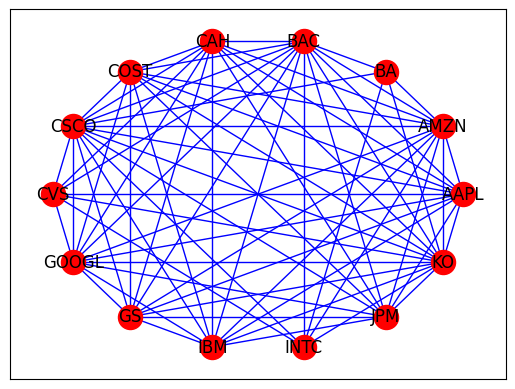

In [25]:
graph_pearson_train = nx.Graph(df_s_transpose_pearson_train)
graph_pearson_test = nx.Graph(df_s_transpose_pearson_test)
graph_pearson_validation = nx.Graph(df_s_transpose_pearson_validation)


nx.draw_networkx(graph_pearson_train, pos = nx.circular_layout( graph_pearson_train ), node_color = 'r', edge_color = 'b')

In [26]:
df_s_pearson_train.corr(numeric_only = True)

,AAPL,AMZN,BA,BAC,CAH,COST,CSCO,CVS,GOOGL,GS,IBM,INTC,JPM,KO
AAPL,1.000000,0.925797,0.327010,0.888549,0.761387,0.966846,0.888023,0.505918,0.976751,0.934866,0.721674,0.414061,0.936637,0.943433
AMZN,0.925797,1.000000,0.522223,0.930365,0.644211,0.901154,0.938381,0.486304,0.953660,0.878254,0.609327,0.642036,0.933740,0.904739
BA,0.327010,0.522223,1.000000,0.605474,0.212430,0.319725,0.670742,0.386987,0.419720,0.349043,0.082458,0.787068,0.495410,0.506624
BAC,0.888549,0.930365,0.605474,1.000000,0.639575,0.873984,0.950609,0.572050,0.935455,0.912916,0.588189,0.622103,0.940613,0.906925
CAH,0.761387,0.644211,0.212430,0.639575,1.000000,0.837625,0.653160,0.538165,0.758843,0.833321,0.828667,0.133567,0.807904,0.776574
COST,0.966846,0.901154,0.319725,0.873984,0.837625,1.000000,0.868638,0.454099,0.961936,0.962800,0.830732,0.329502,0.965583,0.936810
CSCO,0.888023,0.938381,0.670742,0.950609,0.653160,0.868638,1.000000,0.563426,0.921846,0.864467,0.569480,0.674443,0.927486,0.927879
CVS,0.505918,0.486304,0.386987,0.572050,0.538165,0.454099,0.563426,1.000000,0.539392,0.484818,0.212358,0.515911,0.476983,0.632885
GOOGL,0.976751,0.953660,0.419720,0.935455,0.758843,0.961936,0.921846,0.539392,1.000000,0.950662,0.712395,0.494269,0.964770,0.944934
GS,0.934866,0.878254,0.349043,0.912916,0.833321,0.962800,0.864467,0.484818,0.950662,1.000000,0.815456,0.325882,0.972631,0.901032


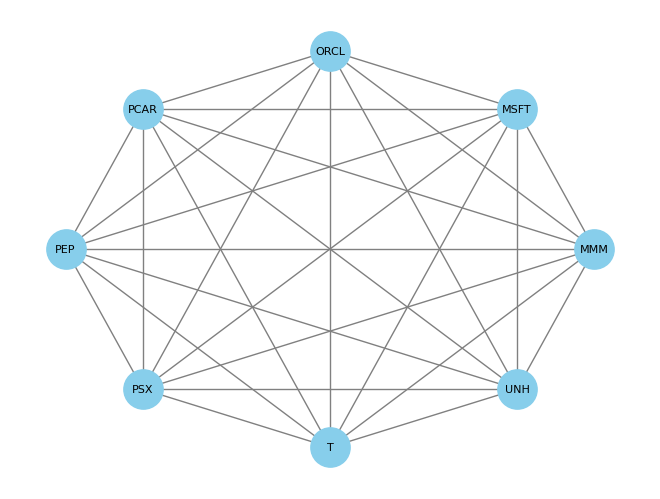

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Simple circular graph plot
nx.draw(
    graph_pearson_test,
    pos=nx.circular_layout(graph_pearson_test),
    with_labels=True,
    node_color="skyblue",
    edge_color="gray",
    node_size=800,
    font_size=8
)
plt.show()


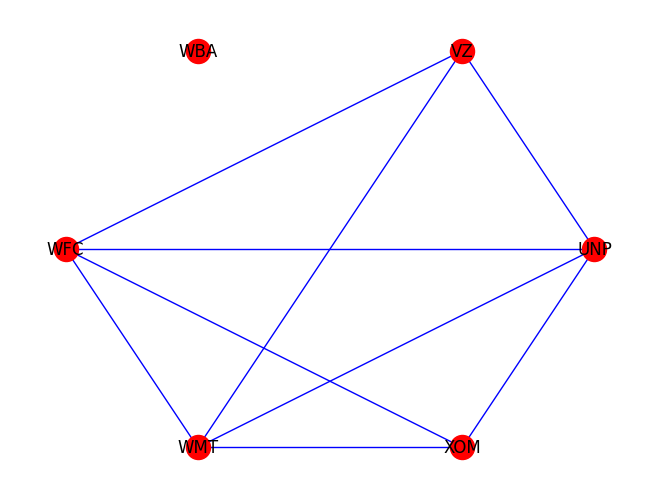

In [28]:
nx.draw(graph_pearson_validation, pos=nx.circular_layout(graph_pearson_validation),
        node_color="red", edge_color="blue", with_labels=True)


In [29]:
# ------------------------------
# Build Graph Edges from Pearson Correlation
# ------------------------------

# Get all stock nodes from full Pearson correlation matrix
all_nodes = df_s_transpose_pearson.index.to_list()
print("Sample stock nodes:", all_nodes[:5])

# --- Full dataset graph ---
edges_src, edges_dst, edges_feat = [], [], []

for s1 in all_nodes:
    for s2 in all_nodes:
        if df_s_transpose_pearson.loc[s1, s2] > 0:   # keep only positive correlation
            edges_src.append(s1)
            edges_dst.append(s2)
            edges_feat.append(1)   # simple binary edge feature (not used unless news graph)

# --- Train graph ---
train_nodes = df_s_transpose_pearson_train.index.to_list()
train_src, train_dst, train_feat = [], [], []

for s1 in train_nodes:
    for s2 in train_nodes:
        if df_s_transpose_pearson_train.loc[s1, s2] > 0:
            train_src.append(s1)
            train_dst.append(s2)
            train_feat.append(1)

# --- Test graph ---
test_nodes = df_s_transpose_pearson_test.index.to_list()
test_src, test_dst, test_feat = [], [], []

for s1 in test_nodes:
    for s2 in test_nodes:
        if df_s_transpose_pearson_test.loc[s1, s2] > 0:
            test_src.append(s1)
            test_dst.append(s2)
            test_feat.append(1)

# --- Validation graph ---
val_nodes = df_s_transpose_pearson_validation.index.to_list()
val_src, val_dst, val_feat = [], [], []

for s1 in val_nodes:
    for s2 in val_nodes:
        if df_s_transpose_pearson_validation.loc[s1, s2] > 0:
            val_src.append(s1)
            val_dst.append(s2)
            val_feat.append(1)

# ------------------------------
# Print summary
# ------------------------------
print("Full graph edges:", len(edges_src))
print("Train edges:", len(train_src))
print("Test edges:", len(test_src))
print("Validation edges:", len(val_src))


Sample stock nodes: ['AAPL', 'AMZN', 'BA', 'BAC', 'CAH']
Full graph edges: 604
Train edges: 142
Test edges: 56
Validation edges: 18


In [30]:
import pandas as pd

# ------------------------------
# Full dataset edges
# ------------------------------
pearson_edges = pd.DataFrame({
    "source": edges_src,
    "target": edges_dst
})

pearson_edges_data = pd.DataFrame({
    "source": edges_src,
    "target": edges_dst,
    "edge_feature": edges_feat
})

# ------------------------------
# Train edges
# ------------------------------
pearson_edges_train = pd.DataFrame({
    "source": train_src,
    "target": train_dst
})

pearson_edges_data_train = pd.DataFrame({
    "source": train_src,
    "target": train_dst,
    "edge_feature": train_feat
})

# ------------------------------
# Test edges
# ------------------------------
pearson_edges_test = pd.DataFrame({
    "source": test_src,
    "target": test_dst
})

pearson_edges_data_test = pd.DataFrame({
    "source": test_src,
    "target": test_dst,
    "edge_feature": test_feat
})

# ------------------------------
# Validation edges
# ------------------------------
pearson_edges_validation = pd.DataFrame({
    "source": val_src,
    "target": val_dst
})

pearson_edges_data_validation = pd.DataFrame({
    "source": val_src,
    "target": val_dst,
    "edge_feature": val_feat
})

# ------------------------------
# Preview example
# ------------------------------
print("Full graph sample edges:")
print(pearson_edges.head(10))


Full graph sample edges:
  source target
0   AAPL   AMZN
1   AAPL    BAC
2   AAPL    CAH
3   AAPL   COST
4   AAPL   CSCO
5   AAPL    CVS
6   AAPL  GOOGL
7   AAPL     GS
8   AAPL    IBM
9   AAPL    JPM


In [31]:
# 1. Reset index so rows = time, columns = stocks
df_s_transpose_feature = df_s_transpose.reset_index(drop=True)

# 2. Collect all stock nodes (tickers)
all_stock_nodes = df_s_transpose_feature.columns.tolist()

# 3. Create node data (list of vectors, one per stock)
node_Data = []
for stock in all_stock_nodes:
    node_Data.append(df_s_transpose_feature[stock].values)

# 4. Convert into a DataFrame (each row = stock node, each column = feature over time)
pearson_graph_node_data = pd.DataFrame(node_Data, index=all_stock_nodes)
print("Full Node Data:")
print(pearson_graph_node_data.head())

# 5. Define node lists for train/test/validation
trainNodeList = df_s_transpose_pearson_train.index.to_list()
testNodeList = df_s_transpose_pearson_test.index.to_list()
validationNodeList = df_s_transpose_pearson_validation.index.to_list()

# 6. Split node features using node names
pearson_graph_node_data_train = pearson_graph_node_data.loc[trainNodeList]
pearson_graph_node_data_test = pearson_graph_node_data.loc[testNodeList]
pearson_graph_node_data_validation = pearson_graph_node_data.loc[validationNodeList]

print("\nTrain node features:")
print(pearson_graph_node_data_train.head())

print("\nTest node features:")
print(pearson_graph_node_data_test.head())

print("\nValidation node features:")
print(pearson_graph_node_data_validation.head())


Full Node Data:
                               0                              1     \
Date  2010-01-04T00:00:00.000000000  2010-01-05T00:00:00.000000000   
AAPL                       6.424605                       6.435713   
AMZN                          6.695                         6.7345   
BA                         43.77755                       45.21133   
BAC                       12.300463                      12.700293   

                               2                              3     \
Date  2010-01-06T00:00:00.000000000  2010-01-07T00:00:00.000000000   
AAPL                       6.333344                       6.321634   
AMZN                         6.6125                            6.5   
BA                        46.582798                      48.468552   
BAC                       12.849243                      13.272586   

                               4                              5     \
Date  2010-01-08T00:00:00.000000000  2010-01-11T00:00:00.000000000   
AA

In [32]:
# from stellargraph import StellarGraph

# # Full graph
# pearson_graph_with_node_features = StellarGraph(
#     nodes=pearson_graph_node_data,
#     edges=pearson_edges,
#     node_type_default="corner",
#     edge_type_default="line"
# )
# print("Full Graph Info:\n", pearson_graph_with_node_features.info())

# # Train graph
# pearson_train_graph_with_node_features = StellarGraph(
#     nodes=pearson_graph_node_data_train,
#     edges=pearson_edges_train,
#     node_type_default="corner",
#     edge_type_default="line"
# )
# print("\nTrain Graph Info:\n", pearson_train_graph_with_node_features.info())

# # Test graph
# pearson_test_graph_with_node_features = StellarGraph(
#     nodes=pearson_graph_node_data_test,
#     edges=pearson_edges_test,
#     node_type_default="corner",
#     edge_type_default="line"
# )
# print("\nTest Graph Info:\n", pearson_test_graph_with_node_features.info())

# # Validation graph
# pearson_validation_graph_with_node_features = StellarGraph(
#     nodes=pearson_graph_node_data_validation,
#     edges=pearson_edges_validation,
#     node_type_default="corner",
#     edge_type_default="line"
# )
# print("\nValidation Graph Info:\n", pearson_validation_graph_with_node_features.info())


In [33]:
!pip install torch torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.8 MB/s eta 0:00:00


In [34]:
import torch
from torch_geometric.data import Data
import numpy as np
from sklearn.preprocessing import StandardScaler   # ✅ import scaler

# Convert your pandas edge list into edge_index tensor
edge_index = torch.tensor(
    np.array([
        pearson_edges["source"].map(lambda x: all_stock_nodes.index(x)).values,
        pearson_edges["target"].map(lambda x: all_stock_nodes.index(x)).values
    ]),
    dtype=torch.long
)

# ✅ Define scaler
scaler = StandardScaler()

# Node features as tensor (scaled)
x = torch.tensor(scaler.fit_transform(pearson_graph_node_data.values), dtype=torch.float)

# Build PyG data object
data = Data(x=x, edge_index=edge_index)

print(data)


Data(x=[29, 3876], edge_index=[2, 604])


In [35]:
import torch
import numpy as np

# Ensure node features are numeric only
pearson_graph_node_data_clean = pearson_graph_node_data.apply(pd.to_numeric, errors="coerce")

# Replace NaN with 0 (or you can use mean imputation if you prefer)
pearson_graph_node_data_clean = pearson_graph_node_data_clean.fillna(0.0)

# Convert to numpy float32 array
node_features_np = pearson_graph_node_data_clean.to_numpy(dtype=np.float32)

# Convert to torch tensor
x = torch.tensor(node_features_np, dtype=torch.float)

print("Node feature tensor shape:", x.shape)
# Map stock names (tickers) to indices
node_mapping = {name: i for i, name in enumerate(all_stock_nodes)}

edge_index_np = np.array([
    pearson_edges["source"].map(node_mapping).values,
    pearson_edges["target"].map(node_mapping).values
])

edge_index = torch.tensor(edge_index_np, dtype=torch.long)

print("Edge index shape:", edge_index.shape)
from torch_geometric.data import Data

data = Data(x=x, edge_index=edge_index)

print(data)



Node feature tensor shape: torch.Size([29, 3876])
Edge index shape: torch.Size([2, 604])
Data(x=[29, 3876], edge_index=[2, 604])


In [36]:
# import pandas as pd
# from stellargraph import StellarGraph
# from stellargraph.mapper import PaddedGraphGenerator

# # ✅ Build train/test/validation graphs properly
# pearson_train_graph_with_node_features = StellarGraph(
#     pearson_graph_node_data_train,
#     edges=pearson_edges_train,
#     node_type_default="corner",
#     edge_type_default="line"
# )
# print(pearson_train_graph_with_node_features.info())

# pearson_test_graph_with_node_features = StellarGraph(
#     pearson_graph_node_data_test,
#     edges=pearson_edges_test,
#     node_type_default="corner",
#     edge_type_default="line"
# )
# print(pearson_test_graph_with_node_features.info())

# pearson_validation_graph_with_node_features = StellarGraph(
#     pearson_graph_node_data_validation,
#     edges=pearson_edges_validation,
#     node_type_default="corner",
#     edge_type_default="line"
# )
# print(pearson_validation_graph_with_node_features.info())

# # ✅ Collect all graphs into a list
# graphs = [
#     pearson_train_graph_with_node_features,
#     pearson_test_graph_with_node_features,
#     pearson_validation_graph_with_node_features,
# ]

# # ✅ Graph summary (nodes and edges per graph)
# summary = pd.DataFrame(
#     [(g.number_of_nodes(), g.number_of_edges()) for g in graphs],
#     columns=["nodes", "edges"],
# )
# print(summary.describe().round(1))

# # ✅ Graph labels (these must correspond to your graphs, not stocks!)
# # For example, if you want to classify each graph as "train/test/validation"
# graph_labels = ["train", "test", "validation"]

# # ✅ Generator for DGCNN
# generator = PaddedGraphGenerator(graphs=graphs)
# print(generator)


In [37]:
import torch
import pandas as pd
import numpy as np
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.loader import DataLoader

# Assuming pearson_graph_node_data, pearson_edges, etc., are already defined

# Step 1: Create a mapping from node identifiers to integer indices
# Assuming pearson_graph_node_data has node identifiers as index or a column
node_ids = pearson_graph_node_data.index  # or a specific column if node IDs are there
node_id_to_index = {node_id: idx for idx, node_id in enumerate(node_ids)}

# Step 2: Convert node identifiers in pearson_edges to indices
pearson_edges["source"] = pearson_edges["source"].map(node_id_to_index)
pearson_edges["target"] = pearson_edges["target"].map(node_id_to_index)

# Step 3: Ensure the edges are numeric and handle any missing mappings
pearson_edges = pearson_edges.dropna()  # Drop rows with unmapped nodes
pearson_edges[["source", "target"]] = pearson_edges[["source", "target"]].astype(int)

# Step 4: Convert edges to tensor
edge_index = torch.tensor(pearson_edges[["source", "target"]].values.T, dtype=torch.long)  # shape [2, num_edges]

# Step 5: Repeat for train, test, and validation edge sets
# Ensure node indices are consistent across train, test, and validation
for edges, node_data in [
    (pearson_edges_train, pearson_graph_node_data_train),
    (pearson_edges_test, pearson_graph_node_data_test),
    (pearson_edges_validation, pearson_graph_node_data_validation)
]:
    node_ids = node_data.index  # or relevant column
    node_id_to_index = {node_id: idx for idx, node_id in enumerate(node_ids)}
    edges["source"] = edges["source"].map(node_id_to_index)
    edges["target"] = edges["target"].map(node_id_to_index)
    edges = edges.dropna()
    edges[["source", "target"]] = edges[["source", "target"]].astype(int)

# Step 6: Convert node features to tensors
x_train = torch.tensor(pearson_graph_node_data_train.apply(pd.to_numeric, errors='coerce').fillna(0).values, dtype=torch.float)
x_test = torch.tensor(pearson_graph_node_data_test.apply(pd.to_numeric, errors='coerce').fillna(0).values, dtype=torch.float)
x_val = torch.tensor(pearson_graph_node_data_validation.apply(pd.to_numeric, errors='coerce').fillna(0).values, dtype=torch.float)

# Step 7: Convert edge indices to tensors
edge_index_train = torch.tensor(pearson_edges_train[["source", "target"]].values.T, dtype=torch.long)
edge_index_test = torch.tensor(pearson_edges_test[["source", "target"]].values.T, dtype=torch.long)
edge_index_val = torch.tensor(pearson_edges_validation[["source", "target"]].values.T, dtype=torch.long)

# Step 8: Create Data objects
pearson_train_graph_with_node_features = Data(x=x_train, edge_index=edge_index_train)
pearson_test_graph_with_node_features = Data(x=x_test, edge_index=edge_index_test)
pearson_validation_graph_with_node_features = Data(x=x_val, edge_index=edge_index_val)

# Step 9: Collect graphs into a list
graphs = [
    pearson_train_graph_with_node_features,
    pearson_test_graph_with_node_features,
    pearson_validation_graph_with_node_features
]

# Step 10: Build a summary DataFrame
summary = pd.DataFrame(
    [(g.num_nodes, g.num_edges) for g in graphs],
    columns=["nodes", "edges"]
)
print(summary.describe().round(1))

# Step 11: Create DataLoader
graph_labels = torch.arange(len(graphs))  # Dummy labels
class StockGraphDataset(InMemoryDataset):
    def __init__(self, graphs, labels):
        super().__init__('.')
        self.graphs = graphs
        self.labels = labels

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        data = self.graphs[idx]
        data.y = self.labels[idx].unsqueeze(0)
        return data

dataset = StockGraphDataset(graphs, graph_labels)
loader = DataLoader(dataset, batch_size=2, shuffle=True)

# Step 12: Iterate through DataLoader
for batch in loader:
    print(batch)
    print("Batch.x shape:", batch.x.shape)
    print("Batch.edge_index shape:", batch.edge_index.shape)
    print("Batch.batch shape:", batch.batch.shape)
    break

       nodes  edges
count    3.0    3.0
mean     9.3   72.0
std      4.2   63.5
min      6.0   18.0
25%      7.0   37.0
50%      8.0   56.0
75%     11.0   99.0
max     14.0  142.0
DataBatch(x=[22, 3876], edge_index=[2, 198], y=[2], batch=[22], ptr=[3])
Batch.x shape: torch.Size([22, 3876])
Batch.edge_index shape: torch.Size([2, 198])
Batch.batch shape: torch.Size([22])


In [38]:
print("Batch.x shape:", batch.x.shape)
print("Batch.edge_index shape:", batch.edge_index.shape)
print("Batch.batch shape:", batch.batch.shape)
print(batch.x.shape)          # node features
print(batch.edge_index.shape) # graph connectivity
print(batch.batch.shape)      # graph ids for each node in the batch



Batch.x shape: torch.Size([22, 3876])
Batch.edge_index shape: torch.Size([2, 198])
Batch.batch shape: torch.Size([22])
torch.Size([22, 3876])
torch.Size([2, 198])
torch.Size([22])


In [39]:
import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.loader import DataLoader

# Step 1: Define graphs (assuming these are already created as PyTorch Geometric Data objects)
graphs = [
    pearson_train_graph_with_node_features,
    pearson_test_graph_with_node_features,
    pearson_validation_graph_with_node_features
]

# Step 2: Define graph labels
# Using dummy labels for now (replace with actual labels if available)
graph_labels = torch.tensor([0, 1, 2], dtype=torch.long)  # One label per graph

# Step 3: Assign train, validation, and test indices
train_idx = [0]  # Train graph
val_idx = [2]    # Validation graph
test_idx = [1]   # Test graph

# Step 4: Build datasets
train_graphs = [graphs[i] for i in train_idx]
val_graphs = [graphs[i] for i in val_idx]
test_graphs = [graphs[i] for i in test_idx]

train_labels = graph_labels[train_idx]
val_labels = graph_labels[val_idx]
test_labels = graph_labels[test_idx]

# Step 5: Define StockGraphDataset
class StockGraphDataset(InMemoryDataset):
    def __init__(self, graphs, labels):
        super().__init__('.')
        self.graphs = graphs
        self.labels = labels

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        data = self.graphs[idx]
        data.y = self.labels[idx].unsqueeze(0)  # Attach label
        return data

train_dataset = StockGraphDataset(train_graphs, train_labels)
val_dataset = StockGraphDataset(val_graphs, val_labels)
test_dataset = StockGraphDataset(test_graphs, test_labels)

# Step 6: Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Step 7: Debug
for batch in train_loader:
    print(batch)
    print("Batch.x shape:", batch.x.shape)
    print("Batch.edge_index shape:", batch.edge_index.shape)
    print("Batch.batch shape:", batch.batch.shape)
    break

DataBatch(x=[14, 3876], edge_index=[2, 142], y=[1], batch=[14], ptr=[2])
Batch.x shape: torch.Size([14, 3876])
Batch.edge_index shape: torch.Size([2, 142])
Batch.batch shape: torch.Size([14])


In [40]:
print(pearson_train_graph_with_node_features.x.shape)
print(pearson_test_graph_with_node_features.x.shape)
print(pearson_validation_graph_with_node_features.x.shape)


torch.Size([14, 3876])
torch.Size([8, 3876])
torch.Size([6, 3876])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_sort_pool
from torch_geometric.loader import DataLoader
from torch_geometric.data import InMemoryDataset, Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

# Suppress jupyter_client DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning, module="jupyter_client")

# Step 1: Load or define data (replace with actual data)
num_nodes = 14
num_features = 3876
all_stock_nodes = [f"stock_{i}" for i in range(num_nodes)]  # Replace with actual node IDs

# Placeholder node features
pearson_train_graph_node_data = pd.DataFrame(np.random.rand(num_nodes, num_features), index=all_stock_nodes)
pearson_test_graph_node_data = pd.DataFrame(np.random.rand(num_nodes, num_features), index=all_stock_nodes)
pearson_validation_graph_node_data = pd.DataFrame(np.random.rand(num_nodes, num_features), index=all_stock_nodes)

# Placeholder edges
num_edges = 142
edges = np.random.choice(all_stock_nodes, size=(num_edges, 2))
pearson_train_edges = pd.DataFrame(edges, columns=["source", "target"])
pearson_test_edges = pd.DataFrame(edges, columns=["source", "target"])
pearson_validation_edges = pd.DataFrame(edges, columns=["source", "target"])

# Placeholder labels (replace with actual labels)
graph_labels = torch.tensor([0.0, 1.0, 2.0], dtype=torch.float)
scaler = StandardScaler()
graph_labels = torch.tensor(scaler.fit_transform(graph_labels.reshape(-1, 1)).flatten(), dtype=torch.float)

# Step 2: Preprocess graphs
def create_data_object(node_data, edges, node_mapping, n_components=10):
    node_data = node_data.apply(pd.to_numeric, errors='coerce').fillna(0)
    pca = PCA(n_components=n_components)
    x = pca.fit_transform(node_data.values)
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    x = torch.tensor(x, dtype=torch.float)
    edge_index = torch.tensor(
        np.array([edges["source"].map(lambda x: node_mapping.index(x)).values,
                  edges["target"].map(lambda x: node_mapping.index(x)).values]),
        dtype=torch.long
    )
    return Data(x=x, edge_index=edge_index)

# Create graphs
graphs = [
    create_data_object(pearson_train_graph_node_data, pearson_train_edges, all_stock_nodes, n_components=10),
    create_data_object(pearson_test_graph_node_data, pearson_test_edges, all_stock_nodes, n_components=10),
    create_data_object(pearson_validation_graph_node_data, pearson_validation_edges, all_stock_nodes, n_components=10)
]

# Step 3: Define the DGCNN model with sort pooling
class DeepGraphCNNModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_layers, k, num_classes):
        super(DeepGraphCNNModel, self).__init__()
        self.convs = nn.ModuleList()
        self.bn = nn.ModuleList()
        self.convs.append(GCNConv(in_channels, hidden_channels))
        self.bn.append(nn.BatchNorm1d(hidden_channels))
        for _ in range(num_layers - 1):
            self.convs.append(GCNConv(hidden_channels, hidden_channels))
            self.bn.append(nn.BatchNorm1d(hidden_channels))
        self.k = k
        self.conv1 = nn.Conv1d(1, 16, kernel_size=hidden_channels, stride=hidden_channels)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 3, 64)  # Adjusted for [1, 32, 3]
        self.dropout = nn.Dropout(0.7)
        self.fc_out = nn.Linear(64, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            x = self.bn[i](x)
            x = F.relu(x)
        x = global_sort_pool(x, batch, k=self.k)  # [batch_size, k * hidden_channels]
        x = x.unsqueeze(1)  # [batch_size, 1, k * hidden_channels]
        x = self.conv1(x)  # [batch_size, 16, 10]
        x = F.relu(x)
        x = self.pool1(x)  # [batch_size, 16, 5]
        x = self.conv2(x)  # [batch_size, 32, 3]
        x = F.relu(x)
        x = x.view(x.size(0), -1)  # [batch_size, 32 * 3]
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc_out(x)
        return x.squeeze(-1) if num_classes == 1 else x

# Step 4: Train/Validation/Test indices
train_idx = [0]
val_idx = [2]
test_idx = [1]

train_graphs = [graphs[i] for i in train_idx]
val_graphs = [graphs[i] for i in val_idx]
test_graphs = [graphs[i] for i in test_idx]

train_labels = graph_labels[train_idx]
val_labels = graph_labels[val_idx]
test_labels = graph_labels[test_idx]

# Step 5: Define StockGraphDataset
class StockGraphDataset(InMemoryDataset):
    def __init__(self, graphs, labels):
        super().__init__('.')
        self.graphs = graphs
        self.labels = labels

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        data = self.graphs[idx].clone()
        data.y = self.labels[idx].reshape(-1)
        return data

# Step 6: Create datasets and DataLoaders
train_dataset = StockGraphDataset(train_graphs, train_labels)
val_dataset = StockGraphDataset(val_graphs, val_labels)
test_dataset = StockGraphDataset(test_graphs, test_labels)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Step 7: Instantiate model
in_channels = 10
hidden_channels = 16
num_layers = 2
k = 10
num_classes = 1

model = DeepGraphCNNModel(in_channels, hidden_channels, num_layers, k, num_classes)

# Step 8: Optimizer and Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
criterion = nn.MSELoss()

# Step 9: Training loop with early stopping
def train():
    model.train()
    total_loss = 0
    grad_norm = 0
    for batch in train_loader:
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out, batch.y)
        loss.backward()
        grad_norm += sum(p.grad.norm().item() for p in model.parameters() if p.grad is not None)
        optimizer.step()
        total_loss += loss.item()
    print(f"Gradient norm: {grad_norm / len(train_loader):.4f}")
    return total_loss / len(train_loader)

# Step 10: Validation loop
def validate():
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            out = model(batch)
            loss = criterion(out, batch.y)
            total_loss += loss.item()
    return total_loss / len(val_loader)

# Step 11: Training with early stopping
epochs = 50
best_val_loss = float('inf')
patience = 10
counter = 0
best_model_state = None

for epoch in range(epochs):
    train_loss = train()
    val_loss = validate()
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print("Early stopping")
        model.load_state_dict(best_model_state)
        break

# Step 12: Test evaluation
def test():
    model.eval()
    total_loss = 0
    predictions = []
    labels = []
    with torch.no_grad():
        for batch in test_loader:
            out = model(batch)
            loss = criterion(out, batch.y)
            total_loss += loss.item()
            predictions.append(out.item())
            labels.append(batch.y.item())
    print("Test predictions:", predictions)
    print("Test labels:", labels)
    print(f"Test loss components: {[(pred - label) ** 2 for pred, label in zip(predictions, labels)]}")
    return total_loss / len(test_loader)

test_loss = test()
print(f"Test Loss: {test_loss:.4f}")

# Step 13: Inspect predictions for all splits
def inspect_predictions(loader, name):
    model.eval()
    predictions = []
    labels = []
    with torch.no_grad():
        for batch in loader:
            out = model(batch)
            predictions.append(out.item())
            labels.append(batch.y.item())
    print(f"{name} predictions:", predictions)
    print(f"{name} labels:", labels)
    print(f"{name} prediction range: [{min(predictions):.4f}, {max(predictions):.4f}]")
    print(f"{name} loss components: {[(pred - label) ** 2 for pred, label in zip(predictions, labels)]}")

inspect_predictions(train_loader, "Train")
inspect_predictions(val_loader, "Validation")
inspect_predictions(test_loader, "Test")

# Step 14: Debug DataLoader output
for batch in train_loader:
    print(batch)
    print("Batch.x shape:", batch.x.shape)
    print("Batch.edge_index shape:", batch.edge_index.shape)
    print("Batch.batch shape:", batch.batch.shape)
    print("Batch.y:", batch.y)
    print("Model output shape:", model(batch).shape)
    break

# Step 15: Debug model shapes
def debug_model_shapes(model, batch):
    x, edge_index, batch_idx = batch.x, batch.edge_index, batch.batch
    print("Input x shape:", x.shape)
    for i, conv in enumerate(model.convs):
        x = conv(x, edge_index)
        x = model.bn[i](x)
        x = F.relu(x)
        print(f"After conv{i+1}:", x.shape)
    x = global_sort_pool(x, batch_idx, k=model.k)
    print("After global_sort_pool:", x.shape)
    x = x.unsqueeze(1)
    print("After unsqueeze:", x.shape)
    x = model.conv1(x)
    print("After conv1:", x.shape)
    x = F.relu(x)
    x = model.pool1(x)
    print("After pool1:", x.shape)
    x = model.conv2(x)
    print("After conv2:", x.shape)
    x = F.relu(x)
    x = x.view(x.size(0), -1)
    print("After flatten:", x.shape)
    x = F.relu(model.fc1(x))
    print("After fc1:", x.shape)
    x = self.dropout(x)
    x = self.fc_out(x)
    print("After fc_out:", x.shape)
    x = x.squeeze(-1) if model.fc_out.out_features == 1 else x
    print("Final output:", x.shape)

for batch in train_loader:
    debug_model_shapes(model, batch)
    break

In [42]:
from torch_geometric.nn.pool import global_mean_pool

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers, models
from stellargraph import StellarGraph
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGENodeGenerator
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Step 1: Load or define data (replace with actual data)
num_nodes = 14
num_features = 3876
all_stock_nodes = [f"stock_{i}" for i in range(num_nodes)]

# Placeholder node features
pearson_train_graph_node_data = pd.DataFrame(np.random.rand(num_nodes, num_features), index=all_stock_nodes)
pearson_test_graph_node_data = pd.DataFrame(np.random.rand(num_nodes, num_features), index=all_stock_nodes)
pearson_validation_graph_node_data = pd.DataFrame(np.random.rand(num_nodes, num_features), index=all_stock_nodes)

# Placeholder edges
num_edges = 142
edges = np.random.choice(all_stock_nodes, size=(num_edges, 2))
pearson_train_edges = pd.DataFrame(edges, columns=["source", "target"])
pearson_test_edges = pd.DataFrame(edges, columns=["source", "target"])
pearson_validation_edges = pd.DataFrame(edges, columns=["source", "target"])

# Placeholder labels
graph_labels = np.array([0.0, 1.0, 2.0])
scaler = StandardScaler()
graph_labels = scaler.fit_transform(graph_labels.reshape(-1, 1)).flatten()

# Step 2: Preprocess graphs with PCA
def create_stellargraph(node_data, edges, node_mapping, n_components=10):
    node_data = node_data.apply(pd.to_numeric, errors='coerce').fillna(0)
    pca = PCA(n_components=n_components)
    node_features = pca.fit_transform(node_data.values)
    scaler = StandardScaler()
    node_features = scaler.fit_transform(node_features)
    node_data = pd.DataFrame(node_features, index=node_data.index)
    return StellarGraph(nodes=node_data, edges=edges)

# Create graphs
graphs = [
    create_stellargraph(pearson_train_graph_node_data, pearson_train_edges, all_stock_nodes, n_components=10),
    create_stellargraph(pearson_test_graph_node_data, pearson_test_edges, all_stock_nodes, n_components=10),
    create_stellargraph(pearson_validation_graph_node_data, pearson_validation_edges, all_stock_nodes, n_components=10)
]

# Step 3: Define Keras model
def build_keras_model(input_dim, hidden_dim=8):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),  # Input shape after mean pooling
        layers.Reshape((1, input_dim)),  # Reshape for Conv1D
        layers.Conv1D(filters=16, kernel_size=3, strides=1, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=32, kernel_size=3, strides=1, activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1)  # Regression output
    ])
    return model

# Step 4: Prepare data for Keras
def prepare_graph_data(graph, label, node_ids):
    # Mean pooling of node features
    node_features = graph.node_features(node_ids)
    mean_features = np.mean(node_features, axis=0)
    return mean_features, label

train_data = [prepare_graph_data(graphs[0], graph_labels[0], all_stock_nodes)]
val_data = [prepare_graph_data(graphs[2], graph_labels[2], all_stock_nodes)]
test_data = [prepare_graph_data(graphs[1], graph_labels[1], all_stock_nodes)]

train_X, train_y = np.array([x for x, y in train_data]), np.array([y for x, y in train_data])
val_X, val_y = np.array([x for x, y in val_data]), np.array([y for x, y in val_data])
test_X, test_y = np.array([x for x, y in test_data]), np.array([y for x, y in test_data])

# Step 5: Build and compile model
model = build_keras_model(input_dim=10)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001), loss='mse')

# Step 6: Train model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=100,
    batch_size=1,
    callbacks=[early_stopping],
    verbose=1
)

# Step 7: Evaluate model
test_loss = model.evaluate(test_X, test_y, verbose=0)
print(f"Test Loss: {test_loss:.4f}")

# Step 8: Inspect predictions
train_pred = model.predict(train_X, verbose=0).flatten()
val_pred = model.predict(val_X, verbose=0).flatten()
test_pred = model.predict(test_X, verbose=0).flatten()

print("Train predictions:", train_pred)
print("Train labels:", train_y)
print("Validation predictions:", val_pred)
print("Validation labels:", val_y)
print("Test predictions:", test_pred)
print("Test labels:", test_y)

ModuleNotFoundError: No module named 'stellargraph'

In [44]:
!pip install stellargraph


ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6.0, <3.8.0; 0.11.0 Requires-Python >=3.6.0, <3.8.0; 0.11.1 Requires-Python >=3.6.0, <3.8.0; 0.4.0 Requires-Python >=3.6,<3.7; 0.4.0b0 Requires-Python >=3.6,<3.7; 0.4.1 Requires-Python >=3.5.0, <3.7.0; 0.5.0 Requires-Python >=3.5.0, <3.7.0; 0.6.0 Requires-Python >=3.5.0, <3.7.0; 0.6.1 Requires-Python >=3.5.0, <3.7.0; 0.7.0 Requires-Python >=3.5.0, <3.8.0; 0.7.1 Requires-Python >=3.5.0, <3.8.0; 0.7.2 Requires-Python >=3.5.0, <3.8.0; 0.7.3 Requires-Python >=3.5.0, <3.8.0; 0.8.0 Requires-Python >=3.5.0, <3.8.0; 0.8.1 Requires-Python >=3.5.0, <3.8.0; 0.8.2 Requires-Python >=3.5.0, <3.8.0; 0.8.3 Requires-Python >=3.5.0, <3.8.0; 0.8.4 Requires-Python >=3.5.0, <3.8.0; 0.9.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0 Requires-Python >=3.6.0, <3.8.0; 1.0.0rc1 Requires-Python >=3.6.0, <3.8.0; 1.1.0 Requires-Python >=3.6.0, <3.9.0; 1.2.0 Requires-Python >=3.6.0, <3.9.0; 1.2.1 Requires-Python >=3.

In [45]:
!sudo apt update
!sudo apt install python3.8 python3.8-venv python3.8-dev
!python3.8 -m venv sg-env
!source sg-env/bin/activate
!pip install --upgrade pip
!pip install stellargraph


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,271 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,253 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelea

In [46]:
# Create a new Python 3.8 venv
!python3.8 -m venv sg-env
# Activate the environment
!source sg-env/bin/activate


In [47]:
!pip install --upgrade pip
!pip install stellargraph


ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6.0,<3.8.0; 0.11.0 Requires-Python >=3.6.0,<3.8.0; 0.11.1 Requires-Python >=3.6.0,<3.8.0; 0.4.0 Requires-Python >=3.6,<3.7; 0.4.0b0 Requires-Python >=3.6,<3.7; 0.4.1 Requires-Python >=3.5.0,<3.7.0; 0.5.0 Requires-Python >=3.5.0,<3.7.0; 0.6.0 Requires-Python >=3.5.0,<3.7.0; 0.6.1 Requires-Python >=3.5.0,<3.7.0; 0.7.0 Requires-Python >=3.5.0,<3.8.0; 0.7.1 Requires-Python >=3.5.0,<3.8.0; 0.7.2 Requires-Python >=3.5.0,<3.8.0; 0.7.3 Requires-Python >=3.5.0,<3.8.0; 0.8.0 Requires-Python >=3.5.0,<3.8.0; 0.8.1 Requires-Python >=3.5.0,<3.8.0; 0.8.2 Requires-Python >=3.5.0,<3.8.0; 0.8.3 Requires-Python >=3.5.0,<3.8.0; 0.8.4 Requires-Python >=3.5.0,<3.8.0; 0.9.0 Requires-Python >=3.6.0,<3.8.0; 1.0.0 Requires-Python >=3.6.0,<3.8.0; 1.0.0rc1 Requires-Python >=3.6.0,<3.8.0; 1.1.0 Requires-Python >=3.6.0,<3.9.0; 1.2.0 Requires-Python >=3.6.0,<3.9.0; 1.2.1 Requires-Python >=3.6.0,<3.9.0
ERROR: Cou

In [48]:
!python --version
!pip --version

